# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Starbucks Project Title Inserted Here

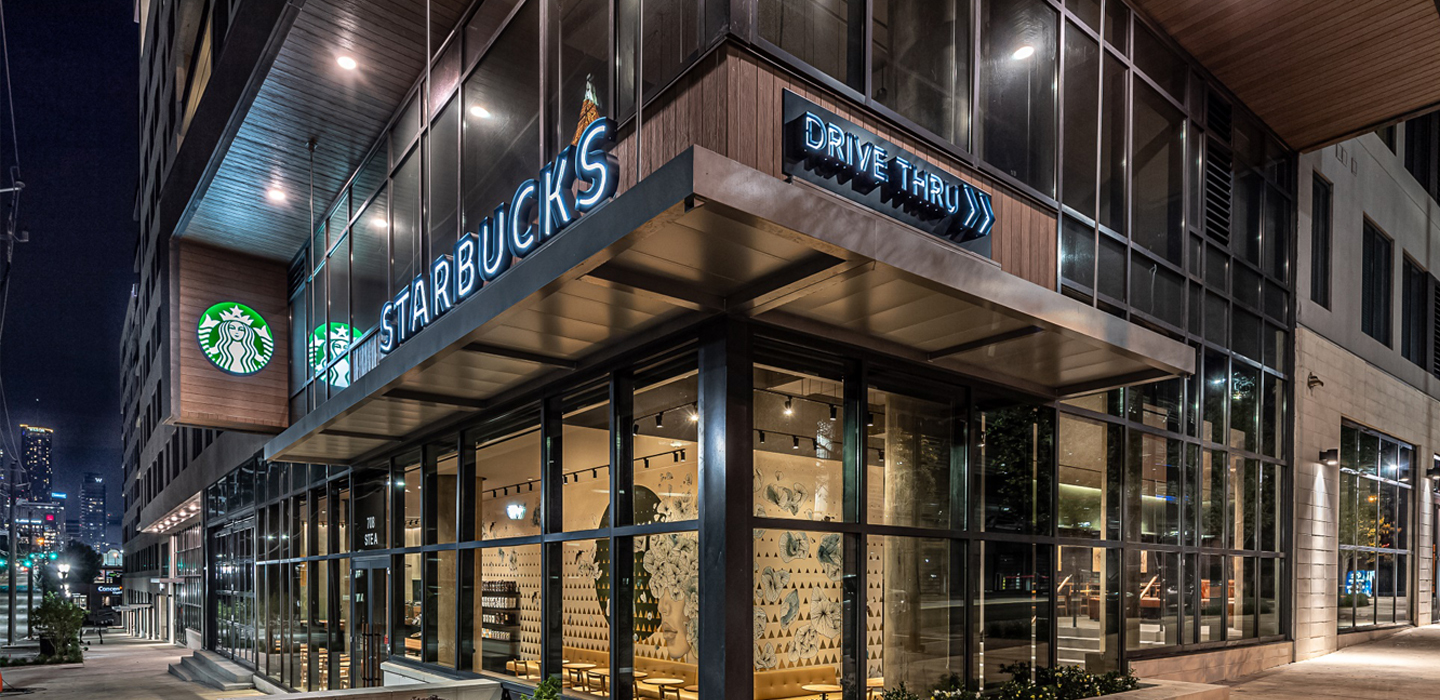

## Table of Contents

1. [Business Understanding](#1)
<br>    1.1. [Business Goals](#1.1)
<br>    1.2. [Situation Assessment](#1.2)
<br>    1.3. [Project Goals](#1.3)
<br>    1.4. [Project Plan](#1.4)
<br><br>
2. [Data Understanding](#2)
<br>    2.1. [Import Packages](#2.1)
<br>    2.2. [Gather Data](#2.2)
<br>    2.3. [Exploratory Data Analysis](#2.3)
<br>    2.4. [Missing Data](#2.4)
<br>    2.5. [Distribution](#2.5)
<br>    2.6. [Price distribution](#2.6)
<br>    2.7. [Removing outliers](#2.7)
<br>    2.8. [Mapbox Scatter Plot](#2.8)
<br>    2.9. [Numerical variable analysis](#2.9)
<br>    2.10. [Categorical variable analysis](#2.10)
<br>    2.11. [Data Understanding Results](#2.11)
<br><br>
3. [Data Preperation](#data_preperation)
<br>    3.1. [Data Understanding](#data_understanding)
<br>    3.2. [Data Preperationxxx](#data_preperation)
<br><br>
4. [Model Data](#model_data)
<br><br>
5. [Results](#results)
<br>    5.1. [Q1: Can we find out if a review will be positive or negative based on just text?](#q1)
<br>    5.2. [Q2: What factors can affect listing prices?](#q2)
<br>    5.3. [Q3. How do those factors affect listing prices?](#q3)

6. [Resources](#resources)

<a id='1'></a>
## 1. Business Understanding

<a id='1.1'></a>
### 1.1. Business Goals

<a id='1.2'></a>
### 1.2. Situation Assessment

<a id='1.3'></a>
### 1.3. Project Goals

<a id='1.4'></a>
### 1.4. Project Plan

<a id='2'></a>
## 2. Data Understanding

<a id='2.1'></a>
### 2.1. Import Packages

In [1]:
# Import
import pandas as pd
import numpy as np
import math
import json
import pickle
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
from tqdm import tqdm

# Check module versions
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

1.3.0
1.21.0
0.11.1


In [2]:
# Display options
pd.set_option('display.max_rows', None, 'display.max_columns', None)

#### Preparing Seaborn Functions

In [3]:
# Function for formatting seaborn chart
def style_sns_1(title, xlabel, ylabel):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title - seaborn plot title (string)
    _label - seaborn plot label (string or list)
    
    OUTPUT:
    None.
    '''
    
    # Titles
    plt.title(title, weight='bold', fontsize=15)

    # Labels
    plt.xlabel(xlabel, weight='bold', fontsize=13)
    plt.ylabel(ylabel, weight='bold', fontsize=13)

    # Design
    plt.xticks(size=13); plt.yticks(size=13)
    
    # Show plot
    plt.show()
    
# Function for formatting seaborn chart
def style_sns_2(title_1, title_2, xlabel_1, ylabel_1, xlabel_2, ylabel_2):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title_n - seaborn plot title on axis n (string)
    label_n - seaborn plot label on axis n (string or list)
    
    OUTPUT:
    None.
    '''

    # Titles
    axes[0].set_title(title_1, weight='bold', fontsize=15)
    axes[1].set_title(title_2, weight='bold', fontsize=15)

    # Labels
    ax1.set_xlabel(xlabel_1, weight='bold', fontsize=13)
    ax1.set_ylabel(ylabel_1, weight='bold', fontsize=13)
    ax2.set_xlabel(xlabel_2, weight='bold', fontsize=13)
    ax2.set_ylabel(ylabel_2, weight='bold', fontsize=13)

    # Design
    ax1.tick_params(labelsize=13); ax2.tick_params(labelsize=13)
    
    # Show plot
    plt.show()
    
# Function for formatting seaborn chart
def style_sns_3(title_1, title_2, title_3, xlabel_1, ylabel_1, xlabel_2, ylabel_2, xlabel_3, ylabel_3):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    title_n - seaborn plot title on axis n (string)
    label_n - seaborn plot label on axis n (string or list)
    
    OUTPUT:
    None.
    '''

    # Titles
    axes[0].set_title(title_1, weight='bold', fontsize=15)
    axes[1].set_title(title_2, weight='bold', fontsize=15)
    axes[2].set_title(title_3, weight='bold', fontsize=15)

    # Labels
    ax1.set_xlabel(xlabel_1, weight='bold', fontsize=13)
    ax1.set_ylabel(ylabel_1, weight='bold', fontsize=13)
    ax2.set_xlabel(xlabel_2, weight='bold', fontsize=13)
    ax2.set_ylabel(ylabel_2, weight='bold', fontsize=13)
    ax3.set_xlabel(xlabel_3, weight='bold', fontsize=13)
    ax3.set_ylabel(ylabel_3, weight='bold', fontsize=13)

    # Design
    ax1.tick_params(labelsize=13); ax2.tick_params(labelsize=13); ax3.tick_params(labelsize=13)
    
    # Show plot
    plt.show()
    
# Function for formatting a pie chart
def style_pie_1(title, labels, data):
    '''This function styles matplotlib pie charts
    
    INPUT:
    title - pie chart title (string)
    labels - pie chart plot label (string or list)
    data - df 
    
    OUTPUT:
    None.
    '''
    
    # Set default plt font size
    plt.rcParams['font.size'] = 15

    # Init plot
    pie, ax = plt.subplots(figsize=[10,6])
    exp_n = len(labels)

    # Title
    plt.title(title, weight='bold', fontsize=15);

    # Plot
    plt.pie(x=data, labels=labels, autopct="%.1f%%", explode=[0.05]*exp_n, pctdistance=0.5)
    plt.show()

<a id='2.2'></a>
### 2.2. Gather Data

**Gather necessary data to answer our questions:**<br>
We have imported the libraries we need above. We will gather data provided to us from Udacity in the form of json files. The next step is to use `pd.read_json()` to import our data into pandas as dataframes.

In [4]:
# Read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

<a id='2.2.1'></a>
### 2.2.1 `Portfolio` Data EDA

**`Portfolio` Data Info**

This dataset holds data on the different offer campaigns used in the Starbucks app.

In [5]:
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [6]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


**`Portfolio` Offer Type Distribution**

In [7]:
[*portfolio['offer_type'].unique()]

['bogo', 'informational', 'discount']

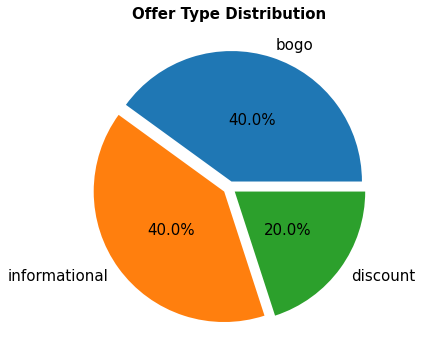

In [8]:
style_pie_1(title='Offer Type Distribution', labels=[*portfolio['offer_type'].dropna().unique()],
            data=portfolio['offer_type'].value_counts())

**`Portfolio Data` Observations:** 
- There are three types of offer including BOGO, information, discount offers
- There are 10 different offers in total. 4 of them are discounts, 4 are BOGO (Buy One Get One Free), and 2 of them are informational (advertisments).
- The `reward` and `difficulty` columns are in USD (US Dollars) units.
- The `duration` column is measured in `days`
- The `channel`, `offer_type`, and `id` columns are categorical
- There are no null values

<a id='2.2.2'></a>
### 2.2.2 `Profile` Data EDA

**`Profile` Data Info**

This dataset holds data on the demographics of users on the Starbucks app.

In [9]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [10]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [11]:
# Looking for outliers
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


**`Profile` Age and Income Distribution**

In [12]:
profile[['age', 'income']].mean()

age          62.531412
income    65404.991568
dtype: float64

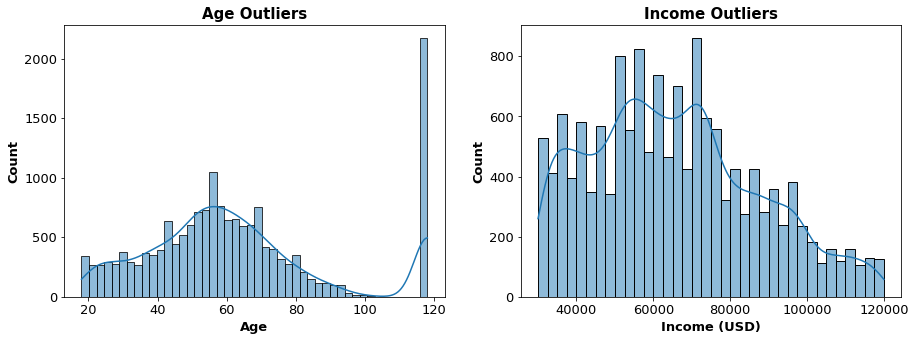

In [13]:
# Looking for age and income outliers in profile using histplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plots
ax1 = sns.histplot(ax=axes[0], data=profile, x='age', kde=True)
ax2 = sns.histplot(ax=axes[1], data=profile, x='income', kde=True)

# Style plot
style_sns_2('Age Outliers', 'Income Outliers', 'Age', 'Count', 'Income (USD)', 'Count')

**`Profile` Age and Income Distribution by Gender**

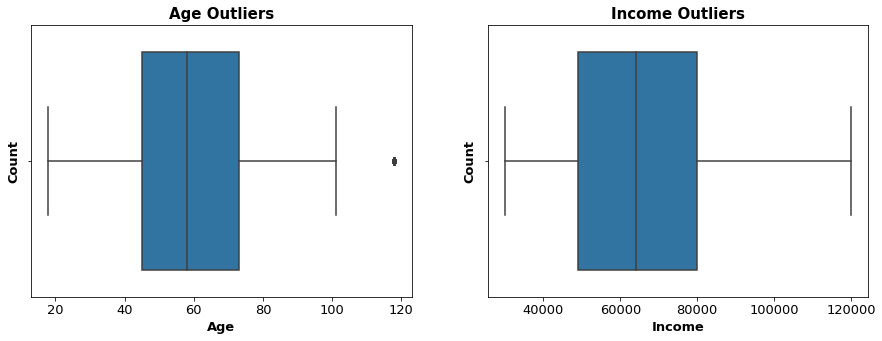

In [14]:
# Looking for age and income outliers in profile using boxplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plots
ax1 = sns.boxplot(ax=axes[0], data=profile, x='age')
ax2 = sns.boxplot(ax=axes[1], data=profile, x='income')

# Style plot
style_sns_2('Age Outliers', 'Income Outliers', 'Age', 'Count', 'Income', 'Count')

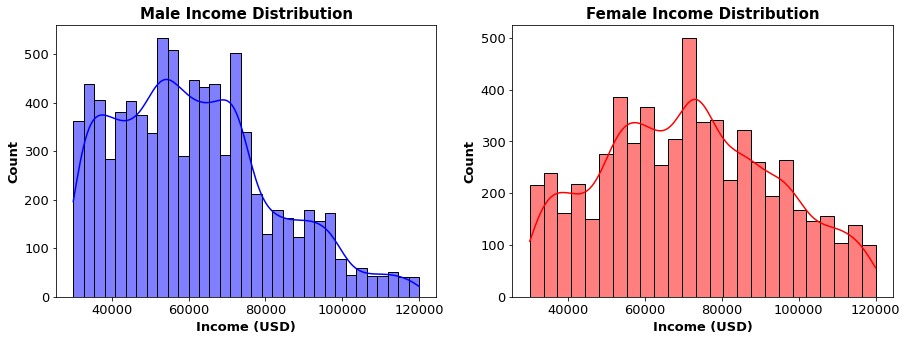

In [15]:
# Income for the main two genders in profile using histplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Data
profile_male = profile[profile['gender'] == 'M']
profile_female = profile[profile['gender'] == 'F']

# Plots
ax1 = sns.histplot(ax=axes[0], data=profile_male, x='income', kde=True, color='blue')
ax2 = sns.histplot(ax=axes[1], data=profile_female, x='income', kde=True, color='red')

# Style plot
style_sns_2('Male Income Distribution', 'Female Income Distribution', 'Income (USD)', 'Count', 'Income (USD)', 'Count')

**`Profile` Age Groups Distribution**

In [16]:
print('Minimum age:', profile['age'].min())
print('Maximum age:', profile['age'].max())

Minimum age: 18
Maximum age: 118


In [17]:
# Create age groups
age_ranges = profile.drop(columns=['id', 'became_member_on', 'income']).copy()
a = age_ranges['age']
age_ranges['age_group'] = a

# Filter age ranges, then replace income integer with strings
age_ranges.loc[a.between(18, 24), 'age_group'] = '18-24'
age_ranges.loc[a.between(25, 34), 'age_group'] = '25-34'
age_ranges.loc[a.between(35, 44), 'age_group'] = '35-44'
age_ranges.loc[a.between(45, 54), 'age_group'] = '45-54'
age_ranges.loc[a.between(55, 64), 'age_group'] = '55-64'
age_ranges.loc[a.between(65, 74), 'age_group'] = '65-74'
age_ranges.loc[a.between(75, 84), 'age_group'] = '75-84'
age_ranges.loc[a.between(66, 94), 'age_group'] = '85-94'
age_ranges.loc[a.between(95, 104), 'age_group'] = '95-104'
age_ranges.loc[a.between(105, 119), 'age_group'] = '105+'

# Null data age ranges
null_ranges = age_ranges.loc[a.between(105, 118)]

In [18]:
# Formatting data for grouped bar plot
age_ranges = age_ranges.groupby(['age_group', 'gender'])['age'].count().reset_index().rename(columns={'age':'count'})
age_ranges['gender'] = age_ranges['gender'].replace({'F':'Female', 'M':'Male', 'O':'Other'})

In [19]:
age_ranges

,age_group,gender,count
0,18-24,Female,238
1,18-24,Male,629
2,18-24,Other,9
3,25-34,Female,407
4,25-34,Male,955
5,25-34,Other,18
6,35-44,Female,622
7,35-44,Male,1218
8,35-44,Other,29
9,45-54,Female,1247


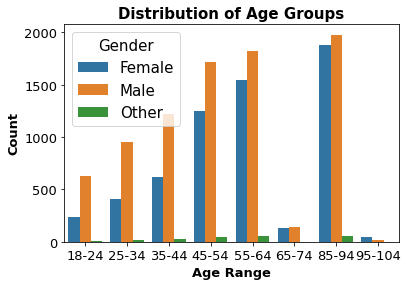

In [20]:
# Plot
sns.barplot(x='age_group', y='count', hue='gender', data=age_ranges).legend(title='Gender')

# Styling
style_sns_1(title='Distribution of Age Groups', xlabel='Age Range', ylabel='Count')

**Note:** None gender ages are omitted from the bar plot due to missing data.

In [21]:
# Sample of age ranges with null gender values
null_ranges.head()

,gender,age,age_group
0,None,118,105+
2,None,118,105+
4,None,118,105+
6,None,118,105+
7,None,118,105+


In [22]:
# Total count of ages over 115
print('Age outlier count:', profile['age'][profile['age'] > 115].count())

# Finding percentage of outliers in age
outliers = profile['age'][profile['age'] > 115].count()
all_age_counts = profile ['age'].count()
print('Age outlier percentage:', round(outliers/all_age_counts*100, 2), '%')

Age outlier count: 2175
Age outlier percentage: 12.79 %


We can see a large number of outliers here in the age column showing around 120 years of age. We could just use the median age to fill their values but the dataset would be imbalanced with most datapoints coming from the median age range. Since we only found 2175 ages over 115, we can safely delete them. We also found a pattern that all ages of 118 have a gender of `none` and income of `NaN`. This suggests to me there is an error with the data being input so it is useless to us even if we decided to impute the values.

**`Profile` Gender Distribution**

In [23]:
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

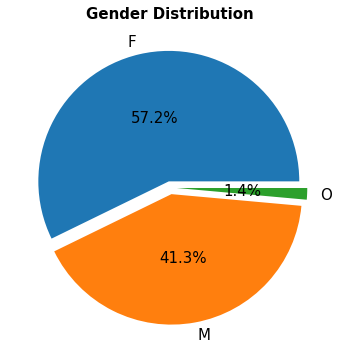

In [24]:
style_pie_1(title='Gender Distribution', labels=[*profile['gender'].dropna().unique()],
            data=profile['gender'].value_counts())

**`Profile` Distribution of when customer became a rewards member**

In [25]:
# Percentage of years users became members on
became_member_on = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
became_member_year = became_member_on.dt.year.value_counts()
became_member_year *= 100 / became_member_year.sum()
became_member_year

2017    38.052941
2018    24.694118
2016    20.741176
2015    10.764706
2014     4.064706
2013     1.682353
Name: became_member_on, dtype: float64

In [26]:
# Percentage of years users became members on
became_member_on = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
became_member_month = became_member_on.dt.month.value_counts()
became_member_month *= 100 / became_member_month.sum()
became_member_month

8     9.470588
10    9.223529
12    9.152941
1     8.970588
9     8.911765
11    8.523529
7     7.994118
3     7.817647
4     7.735294
5     7.688235
6     7.441176
2     7.070588
Name: became_member_on, dtype: float64

In [27]:
# Prepare data for bar plot
profile_members = profile[['became_member_on', 'gender']].copy()
profile_members['year'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d').dt.year
profile_members['gender'] = profile_members['gender'].replace({'F':'Female', 'M':'Male', 'O':'Other'})
member_date = profile_members.groupby(['year','gender']).count().reset_index().iloc[:,:3].rename(
    columns={'became_member_on':'count'})

member_date

,year,gender,count
0,2013,Female,74
1,2013,Male,197
2,2013,Other,3
3,2014,Female,138
4,2014,Male,520
5,2014,Other,4
6,2015,Female,663
7,2015,Male,905
8,2015,Other,29
9,2016,Female,1509


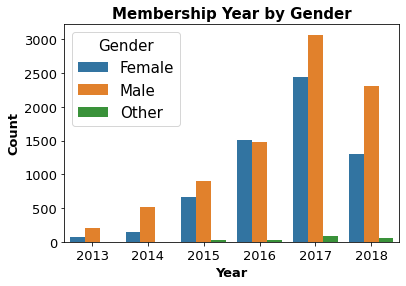

In [28]:
# Plot
sns.barplot(x='year', y='count', hue='gender', data=member_date).legend(title='Gender')

# Styling
style_sns_1(title='Membership Year by Gender', xlabel='Year', ylabel='Count')

**`Profile Data` Observations:** 
- The meadian and mean age of users is around 55 years old
- The maximum age is 118 which is an error, but the minimum age is 18
- Observations with age as 118 seem to be bad data since only the `id` hash is provided
- The income seems to have the most users between 50,000 to 70,000 USD which shows our demographic is mainly older, wealthier individuals
- The maximum income is 120,000 USD, but the minimum is 30,000 USD
- `id` column contains verbose hashes that can be converted to integers to make them easier to navigate
- The hashes should be mapped to the `Transcript` DataFrame since we can match the `id` values
- Females account for 57.2% of the dataset, males account for 41.3% and other only 1.4%. The gender distribution could create some imbalance later

**Transcript Data**

This dataset holds the transaction data including records for transactions, offers received, offers viewed, and offers completed.

In [29]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [30]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [31]:
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [32]:
transcript['person'].nunique()

17000

In [33]:
# Exploring the dictionaries
transcript['value'][0]

{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}

In [34]:
type(transcript['value'][0])

dict

In [35]:
transcript['value'][0].keys()

dict_keys(['offer id'])

In [36]:
# Iterate through the keys in value_col and append to list
value_col = transcript['value']
dict_counter = []
for x in value_col:
    try:
        dict_counter.append([*x.keys()]) # *unpacks the dict to reveal each string value
    except:
        dict_counter.extend([*x.keys()]) # if two values or more cause error then extend list

# File name        
file_name = "data/dict_counter.pkl"

# Save dict as pkl
open_file = open(file_name, "wb")
pickle.dump(dict_counter, open_file)
open_file.close()

In [37]:
# Load dict strings from pkl
open_file = open(file_name, "rb")
loaded_list = pickle.load(open_file)
open_file.close()

In [38]:
# Unique values
loaded = np.array(loaded_list, dtype=object)
np.unique(loaded)

array([list(['amount']), list(['offer id']), list(['offer_id', 'reward'])],
      dtype=object)

**`Transcript Data` Observations:** 
- Found nested dicts in the transcript `value` column from the json which need to be unpacked/flattened to fix the issue
- There are no null values in the dataset
- Categorical columns found are `person`, `value`, `event`

**Note:** Portfolio data looks clean, no changes need to be made at the moment apart from renaming some columns to match the other dataframes.

<a id='2.3'></a>
### 2.3. Assess Data

<blockquote> 
<b>Quality:</b> issues with content. Low quality data is also known as dirty data. <br>
<b>Tidiness:</b> issues with structure that prevent easy analysis. Untidy data is also known as messy data.<br>
    <b>Tidy data requirements:</b>
Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.
</blockquote>

#### 1. Assess `Portfolio`

#### Quality issues

None.

#### Tidiness issues

1. Unpack lists in `channels` column then split categorical columns into dummies then drop their parent columns
2. Rename `id` column to `offer_id`
3. Map each offer hash to in `id` to an integer

#### 2. Assess `Profile`

#### Quality issues

**Note:** These issues should only be addressed after all datasets have been merged in order to retain each `id` hash

1. Missing data such as `None` in `gender` column
2. Missing data such as `NaN` in `income` column
3. Incorrect values such as `118` years old in `age` column

#### Tidiness issues

1. Format `became_member_on` as a datetime object then create `became_member_year` with just the year the user joined
2. Rename `id` column to `user_id`
3. Map each offer hash to in `id` to an integer
4. Split the `income` by quantiles for creating 5 equal income groups as strings
5. Split the `age` by ranges as strings

#### 3. Assess `Transcript`

#### Quality issues

None.

#### Tidiness issues

1. Rename `person` column to `user_id`
2. Unpack dict from `value` column to their own columns then drop `value` column
3. Map each offer hash to in `user_id` and `offer_id` to an integer

<a id='2.5'></a>
# 2.5. Clean Data New

In [39]:
# Copy dataframes
portfolio_new = portfolio.copy()
profile_new = profile.copy()
transcript_new = transcript.copy()

#### 1. Clean `portfolio_new`

#### Define

1. Unpack lists in `channels` column then split categorical columns into dummies then drop their parent columns
2. Rename `id` column to `offer_id`
3. Map each offer hash to in `id` to an integer

#### Code 1

In [40]:
# Unpack list to strings to prepare for dummies
portfolio_new['channels'] = portfolio_new['channels'].str.join(',')

# Use dummies to split at commas
channel_dummies = portfolio_new['channels'].str.get_dummies(',')

# Show dummies
channel_dummies

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


In [41]:
# Get dummies from offer_type column
offer_dummies = pd.get_dummies(portfolio_new['offer_type'], prefix=None)

In [42]:
# Append dummies to portfolio then drop parent columns
portfolio_new = pd.concat([portfolio_new, offer_dummies], axis=1).drop(columns=['offer_type'])
portfolio_new = pd.concat([portfolio_new, channel_dummies], axis=1).drop(columns=['channels'])

#### Code 2

In [43]:
# Rename portfolio columns
portfolio_new = portfolio_new.rename(columns={'id':'offer_id'})

#### Code 3

In [44]:
# Store copy for future use as offer_id hash map
portfolio_hash = portfolio_new.copy() 

# Take the unique hashes from offer_id
offer_id = portfolio_new['offer_id'].unique()
offer_id

array(['ae264e3637204a6fb9bb56bc8210ddfd',
       '4d5c57ea9a6940dd891ad53e9dbe8da0',
       '3f207df678b143eea3cee63160fa8bed',
       '9b98b8c7a33c4b65b9aebfe6a799e6d9',
       '0b1e1539f2cc45b7b9fa7c272da2e1d7',
       '2298d6c36e964ae4a3e7e9706d1fb8c2',
       'fafdcd668e3743c1bb461111dcafc2a4',
       '5a8bc65990b245e5a138643cd4eb9837',
       'f19421c1d4aa40978ebb69ca19b0e20d',
       '2906b810c7d4411798c6938adc9daaa5'], dtype=object)

In [45]:
# Add dict to each hash
offer_dict = portfolio_new['offer_id'].to_dict()
offer_dict

{0: 'ae264e3637204a6fb9bb56bc8210ddfd',
 1: '4d5c57ea9a6940dd891ad53e9dbe8da0',
 2: '3f207df678b143eea3cee63160fa8bed',
 3: '9b98b8c7a33c4b65b9aebfe6a799e6d9',
 4: '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 5: '2298d6c36e964ae4a3e7e9706d1fb8c2',
 6: 'fafdcd668e3743c1bb461111dcafc2a4',
 7: '5a8bc65990b245e5a138643cd4eb9837',
 8: 'f19421c1d4aa40978ebb69ca19b0e20d',
 9: '2906b810c7d4411798c6938adc9daaa5'}

In [46]:
# Swap keys and hash values and start dict from 1 instead of 0
offer_dict = dict([(value, key) for key, value in offer_dict.items()])
offer_dict = dict([(key, value +1) for key, value in offer_dict.items()])

offer_dict

{'ae264e3637204a6fb9bb56bc8210ddfd': 1,
 '4d5c57ea9a6940dd891ad53e9dbe8da0': 2,
 '3f207df678b143eea3cee63160fa8bed': 3,
 '9b98b8c7a33c4b65b9aebfe6a799e6d9': 4,
 '0b1e1539f2cc45b7b9fa7c272da2e1d7': 5,
 '2298d6c36e964ae4a3e7e9706d1fb8c2': 6,
 'fafdcd668e3743c1bb461111dcafc2a4': 7,
 '5a8bc65990b245e5a138643cd4eb9837': 8,
 'f19421c1d4aa40978ebb69ca19b0e20d': 9,
 '2906b810c7d4411798c6938adc9daaa5': 10}

In [47]:
# Map keys to hash in portfolio df
portfolio_new['offer_id'] = portfolio_new['offer_id'].map(offer_dict)

In [48]:
# Create a function for future mapping int to dict
def hash_map(df, col):
    '''This function replaces hashes with integers.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe containing the hashes 'string'
    
    
    OUTPUT:
    none.
    '''
    x_id = df[col].unique()
    x_dict = pd.Series(x_id).to_dict()
    x_dict = dict([(value, key) for key, value in x_dict.items()])
    x_dict = dict([(key, value +1) for key, value in x_dict.items()])
    df[col] = df[col].map(x_dict)
    
# Create a function for future mapping int to dict
def hash_map_offer(df_1, col_1, df_2, col_2):
    '''This function replaces hashes with integers.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe containing the hashes 'string'
    var - variable for column
    
    
    OUTPUT:
    none.
    '''
    # Input 1
    x_id = df_1[col_1].unique()
    x_dict = pd.Series(x_id).to_dict()
    x_dict = dict([(value, key) for key, value in x_dict.items()])
    x_dict = dict([(key, value +1) for key, value in x_dict.items()])
    
    # Input 2
    y_id = df_2[col_2].unique()
    y_dict = pd.Series(y_id).to_dict()
    y_dict = dict([(value, key) for key, value in y_dict.items()])
    y_dict = dict([(key, value +1) for key, value in y_dict.items()])
    df_1[col_1] = df_1[col_1].map(y_dict)

#### Test

In [49]:
# Sort columns
portfolio_new.insert(0, 'offer_id', portfolio_new.pop('offer_id'))
portfolio_new.insert(3, 'reward', portfolio_new.pop('reward'))

In [50]:
portfolio_new

,offer_id,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
0,1,10,7,10,1,0,0,1,1,1,0
1,2,10,5,10,1,0,0,1,1,1,1
2,3,0,4,0,0,0,1,1,1,0,1
3,4,5,7,5,1,0,0,1,1,0,1
4,5,20,10,5,0,1,0,1,0,0,1
5,6,7,7,3,0,1,0,1,1,1,1
6,7,10,10,2,0,1,0,1,1,1,1
7,8,0,3,0,0,0,1,1,1,1,0
8,9,5,5,5,1,0,0,1,1,1,1
9,10,10,7,2,0,1,0,1,1,0,1


#### 2. Clean `profile_new`

#### Define

1. Drop missing data from `profile_new`
2. Format `became_member_on` as a datetime object then create `became_member_year` dummies
3. Rename `id` column to `user_id`
4. Map each offer hash to in `id` to an integer
5. Split the `income` by quantiles for creating 5 equal income groups as strings then get dummies
6. Split the `age` by ranges as strings then get dummies of each
7. Get `gender` dummies
8. Concatenate dummy columns

In [51]:
# Function to move column order
def move_column(df, col, pos):
    '''This function moves the selected column order.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe 'string'
    pos - index position to place col in dataframe 'integer'
    
    OUTPUT:
    none.
    '''
    df.insert(pos, col, df.pop(col))

#### Code 1

In [52]:
# Drop all null data
profile_new = profile_new.dropna()

#### Code 2

In [53]:
# Convert became_member_on to datatime year object
profile_new['became_member_year'] = pd.to_datetime(profile_new['became_member_on'], format='%Y%m%d').dt.year

# Get dummies of member year
year_dummies = pd.get_dummies(profile_new['became_member_year'])

In [54]:
# Drop dummy parent columns
profile_new.drop(columns=['became_member_on', 'became_member_year'], inplace=True)

#### Code 3

In [55]:
# Rename portfolio columns
profile_new = profile_new.rename(columns={'id':'user_id'})

#### Code 4

In [56]:
# Using hash_map function to turn hashes into integers
hash_map(profile_new, 'user_id')

#### Code 5

In [57]:
# Split the income bands by quantiles for creating 5 equal income groups
q = profile_new['income']
q0, q1 = q.quantile(q=0), q.quantile(q=.19)
q2, q3 = q.quantile(q=.2), q.quantile(q=.39)
q4, q5 = q.quantile(q=.4), q.quantile(q=.59)
q6, q7 = q.quantile(q=.6), q.quantile(q=.79)
q8, q9 = q.quantile(q=.8), q.quantile(q=1)

# Append variables
low = q.between(q0, q1)
low_middle = q.between(q2, q3)
middle = q.between(q4, q5)
upper_middle = q.between(q6, q7)
high = q.between(q8, q9)

# Replace income integer with dummies
profile_new['income_group'] = profile_new['income']
profile_new.loc[low, 'income_group'] = 'income_1'
profile_new.loc[low_middle, 'income_group'] = 'income_2'
profile_new.loc[middle, 'income_group'] = 'income_3'
profile_new.loc[upper_middle, 'income_group'] = 'income_4'
profile_new.loc[high, 'income_group'] = 'income_5'

In [58]:
# Change dtype from float to int as there are no null rows now
profile_new['income'] = profile_new['income'].astype(int)

# Income group dummies
income_dummies = pd.get_dummies(profile_new['income_group'], prefix=None)
profile_new = pd.concat([profile_new, income_dummies], axis=1).drop(columns=['income_group'])

#### Code 6

In [59]:
# Create age groups
a = profile_new['age']

# Filter age ranges, then replace income integer with strings
profile_new.loc[a.between(18, 24), 'age_group'] = '18_24'
profile_new.loc[a.between(25, 34), 'age_group'] = '25_34'
profile_new.loc[a.between(35, 44), 'age_group'] = '35_44'
profile_new.loc[a.between(45, 54), 'age_group'] = '45_54'
profile_new.loc[a.between(55, 64), 'age_group'] = '55_64'
profile_new.loc[a.between(65, 74), 'age_group'] = '65_74'
profile_new.loc[a.between(75, 84), 'age_group'] = '75_84'
profile_new.loc[a.between(66, 94), 'age_group'] = '85_94'
profile_new.loc[a.between(95, 104), 'age_group'] = '95_104'

# Turn age_group into dummies then sort columns by ages
age_dummies = pd.get_dummies(profile_new['age_group'], prefix=None)

age_dummies.head()

,18_24,25_34,35_44,45_54,55_64,65_74,85_94,95_104
1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,1,0
8,0,0,0,0,0,1,0,0
12,0,0,0,0,1,0,0,0


In [60]:
# Join age dummies to profile
profile_new = pd.concat([profile_new, age_dummies], axis=1).drop(columns=['age', 'age_group'])

#### Code 7

In [61]:
# Create gender dummies
gender_dummies = pd.get_dummies(profile_new['gender'], prefix=None)
gender_dummies = gender_dummies.rename(columns={
    'F':'female', 'M':'male', 'O':'other'})

# Join dummies to profile
profile_new = pd.concat([profile_new, gender_dummies], axis=1).drop(columns=['gender'])

gender_dummies.head()

,female,male,other
1,1,0,0
3,1,0,0
5,0,1,0
8,0,1,0
12,0,1,0


In [62]:
# Move gender column to start of index
move_column(profile_new, 'female', 1) 
move_column(profile_new, 'male', 2) 
move_column(profile_new, 'other', 3); 

#### Code 8

In [63]:
# Concatenate other dummy columns
profile_new = pd.concat([profile_new, year_dummies], axis=1)

#### Test

In [64]:
profile_new.head()

,user_id,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,85_94,95_104,2013,2014,2015,2016,2017,2018
1,1,1,0,0,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,2,1,0,0,100000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5,3,0,1,0,70000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,4,0,1,0,53000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12,5,0,1,0,51000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


#### 3. Clean `transcript_new`

#### Define

1. Rename `person` column to `user_id`
2. Convert time from hours to days
3. Unpack dict from `value` column to their own columns then drop `value` column
4. Map each offer hash to in `user_id` and `offer_id` to an integer
5. Create `transaction` df by filtering only `user_id` values in `transcript` and `profile` df
    1. Drop null `offer_id` values and remove all columns apart from `user_id`, `time`, and `amount`
6. Create `offer_data` df by using dropna `offer_id` then drop columns `transaction`, `amount`

#### Code 1

In [65]:
# Rename transcript columns
transcript_new = transcript_new.rename(columns={'person':'user_id'})

#### Code 2

In [66]:
# Convert time into days (np.floor can accept arrays)
transcript_new['time'] = np.floor(transcript_new['time'] / 24).astype(int)

#### Code 3

In [67]:
# Extract dict from value column rows in their own columns
transcript_new['offer_id'] = [[*i.values()][0]if [*i.keys()][0] in ['offer id','offer_id'] else np.nan for i in transcript_new.value]
transcript_new['amount'] = [[*i.values()][0]if [*i.keys()][0] in ['amount','amount'] else np.nan for i in transcript_new.value]

# Drop value column
transcript_new = transcript_new.drop(columns=['value'])

#### Code 4

In [68]:
# Using hash_map function to turn hashes of user and offer_ids into integers
hash_map(transcript_new, 'user_id')
hash_map_offer(transcript_new, 'offer_id', portfolio_hash, 'offer_id')

#### Code 5

In [69]:
# Filter user_ids in (customer) profile df
user_count = transcript_new['user_id'].count()
transcript_new = transcript_new[transcript_new['user_id'].isin(profile_new['user_id'])]

# Print user counts before and after operation
print('User count before:', user_count)
print('User count after:', transcript_new['user_id'].count())

User count before: 306534
User count after: 275506


In [70]:
# Create transaction df from transcript
transaction = transcript_new[transcript_new['offer_id'].isna()]
transaction = transaction[['user_id', 'time', 'amount']]

In [71]:
# Get evemt dummies
event_dummies = pd.get_dummies(transcript_new['event'])

# Remove 'offer_' from column name
event_dummies.columns = [col.replace('offer ', '') for col in event_dummies.columns] 

# Join dummies to profile
transcript_new = pd.concat([transcript_new, event_dummies], axis=1).drop(columns=['event'])

event_dummies.head()

,completed,received,viewed,transaction
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


#### Code 6

In [72]:
# Create offer data df
offer_data = transcript_new.dropna(subset=['offer_id'],axis=0).drop(columns=['transaction', 'amount'])
offer_data['offer_id'] = offer_data['offer_id'].astype(int)

#### Test

In [73]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125792 entries, 12654 to 306533
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  125792 non-null  int64  
 1   time     125792 non-null  int32  
 2   amount   125792 non-null  float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 3.4 MB


In [74]:
offer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149714 entries, 0 to 306527
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    149714 non-null  int64
 1   time       149714 non-null  int32
 2   offer_id   149714 non-null  int32
 3   completed  149714 non-null  uint8
 4   received   149714 non-null  uint8
 5   viewed     149714 non-null  uint8
dtypes: int32(2), int64(1), uint8(3)
memory usage: 3.9 MB


In [75]:
offer_data.head()

,user_id,time,offer_id,completed,received,viewed
0,1,0,4,0,1,0
1,2,0,5,0,1,0
2,3,0,10,0,1,0
3,4,0,7,0,1,0
4,5,0,2,0,1,0


In [76]:
offer_data.tail()

,user_id,time,offer_id,completed,received,viewed
306490,12315,29,3,0,0,1
306506,12467,29,7,1,0,0
306507,12468,29,5,0,0,1
306509,12470,29,7,1,0,0
306527,14767,29,7,1,0,0


In [77]:
transaction.head()

,user_id,time,amount
12654,28,0,0.83
12657,37,0,34.56
12659,12651,0,13.23
12670,6658,0,19.51
12671,108,0,18.97


In [98]:
# Count each offer event
event_count = transcript['event'].value_counts()
event_count = pd.DataFrame(event_count).rename(columns={'event':'count'})
event_count

,count
transaction,138953
offer received,76277
offer viewed,57725
offer completed,33579


#### 4. Create `df`

In [79]:
def create_offer_df(portfolio, profile, transaction, offer_data):
    ''' This function creates a DataFrame from:
    1. portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
    2. profile.json - demographic data for each customer
    3. transcript.json - records for transactions, offers received, offers viewed, and offers completed
    
    INPUT:
    portfolio - containing offer ids and meta data about each offer (duration, type, etc.)
    profile - demographic data for each customer
    transaction - records for transactions completed
    offer_data - records offers received, offers viewed, and offers completed

    OUTPUT:
    clean_data - Combined DataFrame showing the success of each offer'''
    
    # Init empty array
    clean_data = []
    
    # List each user id
    user_id_list = offer_data['user_id'].unique()

    # Loop
    for idx in tqdm(range(len(user_id_list))):
        clean_data.extend(combine_data(user_id_list[idx],
                                        portfolio_new,
                                        profile_new,
                                        offer_data,
                                        transaction))    
    
    # Create dataframe
    clean_data = pd.DataFrame(clean_data).sort_values('time')
    
    # Reorder output dataframe columns
    #col_order = 
    #clean_data = clean_data[col_order]
    return clean_data.reset_index(drop=True)

In [80]:
def combine_data(user_id, portfolio, profile, offer_data, transaction):
    ''' The function creates a list of dictionaries describing the success of offers
    sent to each customer
    
    INPUT:
    user_id - customer user id (integer)
    portfolio - containing offer ids and meta data about each offer (duration, type, etc.)
    profile - demographic data for each customer
    transaction - records for transactions completed
    offer_data - records offers viewed, offers viewed, and offers completed
    
    OUTPUT:
    rows - a list of dictionaries describing the success of offers sent to each 
    customer '''
    
    # Filter a specific user
    get_user = profile[profile['user_id'] == user_id]
    
    # Filter offer data for a specific user
    get_offer_data = offer_data['user_id'] == user_id
    user_offer_data = offer_data[get_offer_data]
    user_offer_data = user_offer_data.drop(
        columns='user_id').reset_index(drop=True)
    
    # Filter transaction data for a specific user
    get_transaction = transaction['user_id'] == user_id
    user_transaction_data = transaction[get_transaction]
    user_transaction_data = user_transaction_data.drop(
        columns='user_id').reset_index(drop=True)
    
    
    # Create DataFrames for when a customer receives, views, and completes an offer
    event_cols = ['received', 'viewed', 'completed']
    
    # Received offers
    offer_received = user_offer_data[user_offer_data['received'] == 1]
    offer_received = offer_received.drop(columns=event_cols).reset_index(drop=True)
    
    # Viewed offers
    offer_viewed = user_offer_data[user_offer_data['viewed'] == 1]
    offer_viewed = offer_viewed.drop(columns=event_cols).reset_index(drop=True)
    
    # Completed offers
    offer_completed = user_offer_data[user_offer_data['completed'] == 1]
    offer_completed = offer_completed.drop(columns=event_cols).reset_index(drop=True)
    
    # Iterate over each offer a customer receives
    rows = []
    for idx in range(offer_received.shape[0]):
    
        # Filter current offer id
        get_offer_id = offer_received.iloc[idx]['offer_id']

        # Filter portfolio data for current offer
        get_offer = portfolio.loc[portfolio['offer_id'] == get_offer_id]
        duration = get_offer['duration'].values[0]
        
        # Init time the offer is valid
        get_offer_startime = offer_received.iloc[idx]['time']
        get_offer_endtime = offer_received.iloc[idx]['time'] + duration
        
        # Init boolean array to get transactions within the valid offer time window
        get_transaction = np.logical_and(user_transaction_data['time'] >=
                                         get_offer_startime,
                                         user_transaction_data['time'] <=
                                         get_offer_endtime)
         
        # Init boolean array to find when user completes an offer
        get_offer_completed = np.logical_and(offer_completed['time'] >= get_offer_startime,
                                             offer_completed['time'] <= get_offer_endtime)
        
        # Init boolean array to find when user views an offer
        get_offer_viewed = np.logical_and(offer_viewed['time'] >= get_offer_startime,
                                          offer_viewed['time'] <= get_offer_endtime)
        
        # Find out if current offer was successful
        get_offer_successful = get_offer_completed.sum() > 0 and get_offer_viewed.sum() > 0
        
        # Get customer transactions occuring within the valid offer time window
        get_offer_transactions = user_transaction_data[get_transaction]
        
        # Init dictionary for description of current customer offer
        user_row = {'user_id': user_id,
                    'offer_id': get_offer_id,
                    'time': get_offer_startime,
                    'offer_successful': int(get_offer_successful),
                    'total_amount': get_offer_transactions['amount'].sum()}
        
        # Create dict from 'user_row'
        user_row.update(get_offer.iloc[0,1:].to_dict())
        user_row.update(get_user.iloc[0,1:].to_dict())
        
        # Append 'user_row' to 'rows' list
        rows.append(user_row)
        
    return rows

In [84]:
# Create merged df
clean_data_csvfile = "./data/clean_data.csv"

# Check if csv file already exists. If not, create csv from function.
if os.path.exists(clean_data_csvfile):
    clean_data = pd.read_csv(clean_data_csvfile)
else:
    clean_data = create_offer_df(portfolio_new, profile_new, transaction, offer_data)

    clean_data.to_csv(clean_data_csvfile, index=False)
    
#clean_data = clean_data.drop(columns=['time',
#                                      'customerid',
#                                      'email',
#                                      'informational'])

#column_ordering = ['offerid', 'totalamount']
#column_ordering.extend([elem for elem in clean_data.columns if elem not in column_ordering])

#clean_data = clean_data[column_ordering]
clean_data.head()

100%|████████████████████████████████████████████████████████████████████████████| 14823/14823 [03:08<00:00, 78.44it/s]


,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,4,0,1,37.67,5,7,5,1,0,0,1,1,0,1,1,0,0,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,8040,8,0,0,32.90,0,3,0,0,0,1,1,1,1,0,0,1,0,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2593,5,0,0,0.00,20,10,5,0,1,0,1,0,0,1,1,0,0,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,8039,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,0,1,0,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [87]:
clean_data[['offer_id', 'offer_successful']].groupby('offer_id').sum().reset_index()

,offer_id,offer_successful
0,1,3482
1,2,3185
2,3,655
3,4,3226
4,5,2957
5,6,4601
6,7,4815
7,8,533
8,9,3879
9,10,3126


In [100]:
transaction[transaction['user_id']==8041]

,user_id,time,amount
78626,8041,8,1.87
89966,8041,9,3.54
95918,8041,10,1.38
101025,8041,11,2.44
109570,8041,13,1.68
166074,8041,17,3.09
287204,8041,26,1.55


In [99]:
clean_data.head(100)

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,85_94,95_104,2013,2014,2015,2016,2017,2018
0,1,4,0,1,37.67,5,7,5,1,0,0,1,1,0,1,1,0,0,112000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,8040,8,0,0,32.90,0,3,0,0,0,1,1,1,1,0,0,1,0,66000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,2593,5,0,0,0.00,20,10,5,0,1,0,1,0,0,1,1,0,0,50000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,8039,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,0,1,0,94000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,8038,1,0,1,17.40,10,7,10,1,0,0,1,1,1,0,1,0,0,117000,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
6,2594,6,0,1,64.17,7,7,3,0,1,0,1,1,1,1,0,1,0,68000,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
7,8037,3,0,0,0.00,0,4,0,0,0,1,1,1,0,1,0,1,0,77000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
8,8036,10,0,1,60.34,10,7,2,0,1,0,1,1,0,1,0,0,1,67000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,2595,10,0,1,18.27,10,7,2,0,1,0,1,1,0,1,1,0,0,59000,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [101]:
clean_data[clean_data['user_id'] == 8041]

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,85_94,95_104,2013,2014,2015,2016,2017,2018
1,8041,8,0,0,0.00,0,3,0,0,0,1,1,1,1,0,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
19636,8041,7,7,1,14.00,10,10,2,0,1,0,1,1,1,1,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
25837,8041,10,14,0,3.09,10,7,2,0,1,0,1,1,0,1,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
44022,8041,10,17,0,3.09,10,7,2,0,1,0,1,1,0,1,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
56182,8041,3,21,0,0.00,0,4,0,0,0,1,1,1,0,1,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
60335,8041,9,24,0,1.55,5,5,5,1,0,0,1,1,1,1,1,0,0,62000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [102]:
clean_data[clean_data['total_amount'] == 48.31]

,user_id,offer_id,time,offer_successful,total_amount,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web,female,male,other,income,income_1,income_2,income_3,income_4,income_5,18_24,25_34,35_44,45_54,55_64,65_74,85_94,95_104,2013,2014,2015,2016,2017,2018
3360,8536,9,0,1,48.31,5,5,5,1,0,0,1,1,1,1,1,0,0,85000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
12865,13719,3,7,0,48.31,0,4,0,0,0,1,1,1,0,1,0,1,0,32000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
34344,10666,5,14,1,48.31,20,10,5,0,1,0,1,0,0,1,1,0,0,53000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
63863,11035,10,24,1,48.31,10,7,2,0,1,0,1,1,0,1,0,1,0,76000,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [92]:
def initialize_percent_success(portfolio, clean_data):
    """ Initializes a DataFrame that describes the success percentage for
    each offer
    
    INPUT:
        portfolio: DataFrame containing offer ids and meta data about 
                   each offer (duration, type, etc.)
        clean_data: DataFrame that characterizes the effectiveness of
                    customer offers
    
    OUTPUT:
        percent_success: DataFrame that describes the success percentage for
                         each offer"""
    successful_count =\
        clean_data[['offer_id',
                    'offer_successful']].groupby('offer_id').sum().reset_index()

    offer_count = clean_data['offer_id'].value_counts()

    offer_count = pd.DataFrame(list(zip(offer_count.index.values,
                                        offer_count.values)),
                               columns=['offer_id', 'count'])

    successful_count = successful_count.sort_values('offer_id')

    offer_count = offer_count.sort_values('offer_id')

    percent_success = pd.merge(offer_count, successful_count, on="offer_id")

    percent_success['percent_success'] =\
        100 * percent_success['offer_successful'] / percent_success['count']

    percent_success = pd.merge(percent_success,
                               portfolio,
                               on="offer_id")

    percent_success = percent_success.drop(columns=['offer_successful'])

    percent_success = percent_success.sort_values('percent_success',
                                                  ascending=False)

    return percent_success.reset_index(drop=True)

In [93]:
initialize_percent_success(portfolio_new,
                               clean_data)

,offer_id,count,percent_success,difficulty,duration,reward,bogo,discount,informational,email,mobile,social,web
0,7,6756,71.269982,10,10,2,0,1,0,1,1,1,1
1,6,6788,67.781379,7,7,3,0,1,0,1,1,1,1
2,9,6784,57.178656,5,5,5,1,0,0,1,1,1,1
3,1,6862,50.743224,10,7,10,1,0,0,1,1,1,0
4,2,6733,47.304322,10,5,10,1,0,0,1,1,1,1
5,4,6855,47.060540,5,7,5,1,0,0,1,1,0,1
6,10,6855,45.601751,10,7,2,0,1,0,1,1,0,1
7,5,6874,43.017166,20,10,5,0,1,0,1,0,0,1
8,3,6796,9.638022,0,4,0,0,0,1,1,1,0,1
9,8,6812,7.824427,0,3,0,0,0,1,1,1,1,0


#### 4. Create `df`

#### Define

1. Merge `portfolio_new`, `profile_new`, and `transcript_new` datasets
2. Missing data in `df`

#### Code 1

In [ ]:
# Match dtype to transcript df for merge
portfolio_new['offer_id'] = portfolio_new['offer_id'].astype(float)

In [ ]:
df_merge_1 = pd.merge(transcript_new, profile_new, on='user_id'); df_merge_1.head()

In [ ]:
df_merge_2 = pd.merge(df_merge_1, portfolio_new, on='offer_id', how='left'); df_merge_2.head()

#### Code 2

In [ ]:
# Remove missing columns based on gender subset
df = df_merge_2.dropna(subset=['gender'], axis=0)

#### Test

In [ ]:
df.info()

In [ ]:
df.head(10)

We should sort the columns by the most relevant groups of data. On the left we can have ids and meta data for each user. On the right we can have the offer data.

In [ ]:
profile_new.head()

In [ ]:
# Turn into strftime then into datetime to avoid timedelta format
df = df.assign(string_time=datetime.today().strftime("%Y%m%d"))
df['member_days'] = pd.to_datetime(df['string_time'], format='%Y%m%d') - df['became_member_on']
df = df.drop(columns=['string_time'])

In [ ]:
df.columns

In [ ]:
# Reorder columns to make sense of data
df = df[['user_id','gender', 'age', 'age_group', 'became_member_on', 
         'became_member_year', 'member_days', 'income', 'income_group',
         'offer_id', 'offer_type', 'event', 'time', 'amount', 'offer_reward', 
         'difficulty', 'duration', 'channel_email', 'channel_mobile',
         'channel_social', 'channel_web']]

In [ ]:
df.head()

In [ ]:
df[df['user_id'] == 1].head(10)

In [ ]:
stop

# Capstone Challenge Code

# def event_df(df, '')

In [ ]:
# Filtering df by event status
offer_received_df = df[df['event'] == 'offer received']
offer_viewed_df = df[df['event'] == 'offer viewed']
offer_completed_df = df[df['event'] == 'offer completed']
transaction_df = df[df['event'] == 'transaction']

In [ ]:
offer_received_df[['user_id', 'offer_id']].value_counts().to_frame().rename(columns={0:'count'}).sort_index(ascending=True).head(10)

In [ ]:
offers_received = offer_received_df[['user_id', 'offer_id']].value_counts().sort_index(
    ascending=True).reset_index().rename(columns={0:'count'})

In [ ]:
offers_viewed = offer_viewed_df[['user_id', 'offer_id']].value_counts().sort_index(
    ascending=True).reset_index().rename(columns={0:'count'})

In [ ]:
offers_received.head()

In [ ]:
offers_viewed.head()

In [ ]:
offers_viewed.head()

In [ ]:
# Total offers viewed for user 1
offers_viewed[offers_viewed['user_id'] == 1].sum().loc['count']

In [ ]:
offer_received_df.shape

In [ ]:
offer_received_df.head()

In [ ]:
df[df['user_id'] == 5]

# Change to vectors

This dataframe has users that did not view the offer but still completed the offer unintentionally. This information will cause our results to be skewed as they were not influenced by the offer so we will remove them from our dataset. We only want users that viewed the offer.

## HOT ENCODE offer DATA

In [ ]:
df['event'].value_counts()

In [ ]:
df[df['event'] == 'offer viewed'].head()

In [ ]:
# DataFrame that contains information about offer viewed is df_offer_viewed
# DataFrame that contains information about offer completed is df_offer_completed

# DataFeame containing user id and offer id of each user who viewed the offer and their count of how many times offer was viewed
ov_row_count = offer_viewed_df[['user_id','offer_id']].value_counts().reset_index().rename(columns={0:'count'})

# DataFeame containing user id and offer id of each user who completed the offer
oc_user_offer = offer_completed_df[['user_id','offer_id']]


index_completed = []
# iterrate over offer_viewed_df
for i, row_ov in ov_row_count.iterrows():
    offer_count = row_ov['count']
    # Match the ids of offer view and offer completed dfs
    for j, row_oc in oc_user_offer[(oc_user_offer['user_id']==row_ov['user_id'])&(oc_user_offer['offer_id']==row_ov['offer_id'])].iterrows():
        # Break the loop if the offer_viewed count is 0
        if offer_count <= 0:
            break
        # Append 'index' counter column to df
        if((row_oc['user_id']==row_ov['user_id']) and (row_oc['offer_id']==row_ov['offer_id'])):
            index_completed.append(j)
            offer_count -= 1

df_offer_completed = offer_completed_df.reset_index()[offer_completed_df.reset_index()['index'].isin(index_completed)]

In [ ]:
df_offer_completed.head(20)

In [ ]:
# Offer viewed count
ov_count = ov_row_count[['user_id', 'offer_id']].value_counts().sort_index(
    ascending=True).reset_index().rename(columns={0:'count'})

# Offer completed count
oc_count = df_offer_completed[['user_id', 'offer_id']].value_counts().sort_index(
    ascending=True).reset_index().rename(columns={0:'count'})

In [ ]:
ov_count.head(20)

In [ ]:
oc_count.head(20)

In [ ]:
# Map age group to count dfs
ov_count = ov_count.merge(df[['user_id', 'age_group']])
oc_count = oc_count.merge(df[['user_id', 'age_group']])

In [ ]:
# Add offer type
oc_count['offer_type'] = portfolio_new['offer_type']

In [ ]:
portfolio_new

In [ ]:
pd.merge(left=oc_count, right=portfolio_new[['offer_id', 'offer_type']])

In [ ]:
portfolio_new.head()

In [ ]:
oc_count.head()

# Correct Fix

In [ ]:
#portfolio_new[['offer_id']].merge(oc_count.head(10), how='right', on='offer_id') #.drop(columns='offer_type_x')

In [ ]:
ocm = oc_count.merge(portfolio_new[['offer_id', 'offer_type']], how='right').groupby(['age_group'])['offer_type'].sum() #.sort_index(
    #ascending=True).reset_index()
ocm    

In [ ]:
oc_count.head(30)

In [ ]:
ov_count.head(20)

In [ ]:
df_offer_completed['amount'].count()

In [ ]:
df_offer_completed['event'].value_counts()

In [ ]:
df_offer_completed.shape

In [ ]:
ov_count['count'].sum()

In [ ]:
# Add legend
ax1, ax2 = plt.subplots(figsize=[15,6])
ax1 = sns.countplot(x = 'age_group', data = ov_count, color = 'red', order=['18-24','25-34','35-44',
                                                                           '45-54','55-64','55-64',
                                                                           '65-74','75-84','85-94',
                                                                           '95-104','105+'])

ax2 = sns.countplot(x = 'age_group', data = oc_count, color = 'blue', order=['18-24','25-34','35-44',
                                                                           '45-54','55-64','55-64',
                                                                           '65-74','75-84','85-94',
                                                                           '95-104','105+'])

In [ ]:
# oc_ov_pct
offer_viewed_df[['age_group']].value_counts().sort_index(
    ascending=True).reset_index().rename(columns={0:'count'})

In [ ]:
oc_count_df = oc_count[['age_group']].value_counts().sort_index(
    ascending=True).reset_index().rename(columns={0:'count'})
oc_count_df

In [ ]:
ov_count_df = ov_count[['age_group']].value_counts().sort_index(
    ascending=True).reset_index().rename(columns={0:'count'})
ov_count_df

In [ ]:
offer_pct = oc_count_df.copy()
offer_pct['percentage'] = oc_count_df['count']/ov_count_df['count']*100
offer_pct = offer_pct.drop(columns=['count'])

In [ ]:
offer_pct

In [ ]:
stop

<a id='2.5'></a>
### 2.5. Clean Data

# MOVE TO DATA CLEANING SECTION

**Missing Data for age and income**

In [ ]:
# Show null income
profile[profile['income'].isnull()].head()

In [ ]:
# Show outliers
profile[profile['age'] > 115].head()

In [ ]:
# Removing null data and outliers from all columns
profile.dropna().head()

#### 1. Clean `Portfolio`

#### Define

1. Rename `id` column to `offer_id` in `Portfolio`
2. Rename `difficulty` column to `min_spend`

#### Code

In [ ]:
# Rename portfolio id column
portfolio = portfolio.rename(columns={'id':'offer_id', 'difficulty':'min_spend'})

#### Test

In [ ]:
portfolio.columns

#### Define

1. Missing data such as `None` in `gender` column
2. Missing data such as `NaN` in `income` column

#### 2. Clean `Profile`

#### Define

1. Change `String` data type to `DateTime` in `became_member_on` column
2. Rename `became_member_on` column to `date_joined` in `Profile`

#### Code

In [ ]:
# Convert became_member_on to datatime object
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

In [ ]:
# Rename profile columns
profile = profile.rename(columns={'id':'customer_id', 'became_member_on':'date_joined'})

#### Test

In [ ]:
profile[:1]

#### 3. Clean `Transcript`

#### Define

Rename `person` column to `customer_id` in `Transcript`

#### Code

In [ ]:
# Rename transcript columns
transcript = transcript.rename(columns={'person':'customer_id'})

#### Test

In [ ]:
transcript[:1]

<a id='2.6'></a>
### 2.6. Exploratory Data Analysis 

**Distribution**

In [ ]:
# Gender distribution
sns.catplot(x='gender', kind='count', data=profile)

# Style plot
style_sns_1('Gender Distribution', 'Gender', 'Count')

In [ ]:
# Pie chart normalised
style_pie_1(title='Gender Distribution', labels=['Male', 'Female', 'Other'], data=profile['gender'].value_counts())

In [ ]:
# Percentage splits
profile['gender'].value_counts(normalize=True)

**Observations:** Males account for 57% of users which may cause the dataset to become imbalanced.

# 2. Split data into 4 DataFrames for `offer_received`, `offer_viewed`, `offer_completed`, and `transaction`

<a id='2.5'></a>
### 2.5. Distribution

**Outliers after dropping missing data**

In [ ]:
# Looking for age and income outliers in profile using histplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Plots
ax1 = sns.histplot(ax=axes[0], data=profile, x='age', kde=True)
ax2 = sns.histplot(ax=axes[1], data=profile, x='income', kde=True)

# Style plot
style_sns_2('Age Outliers', 'Income Outliers', 'Age', 'Count', 'Income', 'Count')

In [ ]:
# Average age
profile['age'].mean()

In [ ]:
profile.info()

In [ ]:
# Show outliers
profile.head()

In [ ]:
transcript['value'].head()

In [ ]:
transcript.head()

In [ ]:
df = transcript.copy()

In [ ]:
# Extract dict from value column rows in their own columns
df['offer_id'] = [[*i.values()][0]if [*i.keys()][0] in ['offer id','offer_id'] else None for i in transcript.value]
df['reward'] = [[*i.values()][0]if [*i.keys()][0] in ['reward','reward'] else None for i in transcript.value]
df['amount'] = [[*i.values()][0]if [*i.keys()][0] in ['amount','amount'] else None for i in transcript.value]

In [ ]:
df.iloc[-10:]

In [ ]:
# Replace spaces in the event values before converting them to columns using dummies
df['event'] = df['event'].str.replace(' ', '_')

In [ ]:
dummies = pd.get_dummies(df['event'])
df = pd.concat([df, dummies], axis=1)

In [ ]:
df.head()

In [ ]:
portfolio

We need to get the offer_id from the portfolio dataset and append it to the new df.

In [ ]:
transcript.head()

In [ ]:
df = pd.merge(df, profile, on='customer_id')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.drop(['value', 'event', 'reward'], axis='columns')
df[:1]

In [ ]:
df = pd.merge(df, portfolio, on='offer_id', how='left')
df[:1]

In [ ]:
# Finding data type of channel column
type(df['channels'][0])

In [ ]:
# Convert column to strings to prepare for dummies
df['channels'] = df['channels'].str.join(',')

In [ ]:
# Finding data type of channel column
type(df['channels'][0])

In [ ]:
df['channels'].head()

In [ ]:
# Use dummies to split at commas
dummies = df['channels'].str.get_dummies(',')
dummies.head()

In [ ]:
# Append dummies to df
df = pd.concat([df, dummies], axis=1)

In [ ]:
df[:1]

In [ ]:
# Drop channel column
df = df.drop(['channels'], axis='columns')

In [ ]:
# Use dummies to split at commas
dummies = df['gender'].str.get_dummies(',')
dummies = dummies.rename(columns={'F':'gender_female', 'M':'gender_male', 'O':'gender_other'})
df_gender = df['gender'].copy()
df = df.drop(['gender'], axis='columns')
dummies.head()

In [ ]:
# Use dummies to split at commas
dummies = df['offer_type'].str.get_dummies(',')
dummies = dummies.rename(columns={'bogo':'bogo_offer', 'discount':'discount_offer', 'informational':'informational_offer'})
df_offer_type = df['offer_type'].copy()
df = df.drop(['offer_type'], axis='columns')
dummies.head()

In [ ]:
df = pd.concat([df, dummies], axis=1)
df.head()

In [ ]:
# Lowest age
df['age'].min()

In [ ]:
# Dummies for age ranges
df['18-24'] = df['age'].between(18, 24).astype(int) # Age Group 18-24
df['25-34'] = df['age'].between(25, 34).astype(int) # Age Group 25-34
df['35-44'] = df['age'].between(35, 44).astype(int) # Age Group 35-44
df['45-54'] = df['age'].between(45, 54).astype(int) # Age Group 45-54
df['55-64'] = df['age'].between(55, 64).astype(int) # Age Group 55-64
df['65+'] = df['age'].between(65, df['age'].max()).astype(int) # Age Group 65+

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.fillna(value={'offer_id': 'None', 'amount': 0, 'reward': 0, 'income': 0, 'min_spend': 0, 'duration': 0}, inplace=True)

In [ ]:
df.head() # 'None' counts as NaN

# Move

In [ ]:
# Count of users that received offers
df['offer_received'].value_counts()

In [ ]:
# Count of users that received bogo offers
df['bogo_offer'].value_counts()

In [ ]:
# Count of users that received informational offers
df['informational_offer'].value_counts()

In [ ]:
# Function for formatting seaborn chart
def offer_counts(df, offer_status, offer_type):
    '''This function styles seaborn charts with 2 subplots.
    
    INPUT:
    df - dataframe 'variable'
    offer_status - offer status column in dataframe 'string'
    offer_type - offer type column in dataframe 'string'
    
    OUTPUT:
    integer.
    '''
    try:
        output = df[[offer_status, offer_type]][(df[offer_status] == 1) & (df[offer_type] == 1)].value_counts().values[0]
        return output
    except:
        pass

In [ ]:
# Test function
offer_counts(df, 'offer_viewed' ,'discount_offer')

In [ ]:
offer_status_cols = ['offer_received', 'offer_viewed', 'offer_completed']
offer_type_cols = ['discount_offer', 'bogo_offer', 'informational_offer']
arr_1 = []

for x in offer_type_cols:
    orc = offer_counts(df, offer_status_cols[0], x)
    ovc = offer_counts(df, offer_status_cols[1], x)
    occ = offer_counts(df, offer_status_cols[2], x)
    np.array(arr_1.append([orc, ovc, occ]))
arr_1 = np.array(arr_1)

In [ ]:
# Print array
arr_1

In [ ]:
# Transpose data to match dataframe
arr_1 = np.transpose(arr_1)
arr_1

In [ ]:
# Create df with results
offer_stats = pd.DataFrame((arr_1), columns=['offer_received', 'offer_viewed', 'offer_completed'], 
                           index=['discount','bogo','informational'])
# Fill 0 with NaN
offer_stats = offer_stats.fillna(value=np.nan)
offer_stats

In [ ]:
# Offers distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)
x = offer_stats.index; data = offer_stats

# Plots
ax1 = sns.barplot(ax=axes[0], x=x, y='offer_received', data=data)
ax2 = sns.barplot(ax=axes[1], x=x, y='offer_viewed', data=data)
ax3 = sns.barplot(ax=axes[2], x=x[:2], y='offer_completed', data=data[:2]) # Dropna for missing value

# Style plot
style_sns_3('Offers Received', 'Offers Completed', 'Offers Viewed', 'Offer Type', 'Count', 'Offer Type', 
            '', 'Offer Type', '')

In [ ]:
# Filter columns to take numerical variable col names
num = df.copy()
num_cols = num.select_dtypes(include='number').mean() >= 1
num_cols = num_cols[num_cols == True].dropna()
num_cols = num_cols.index.tolist()
num_cols

In [ ]:
# Filter columns to take categories variable col names
cat = df.copy()
cat_cols = cat.select_dtypes(include='number').mean() <= 1
cat_cols = cat_cols[cat_cols == True].dropna()
cat_cols = cat_cols.index.tolist()
cat_cols

In [ ]:
# Select numerical variables to use for our model
num = df[num_cols]
num.head()

In [ ]:
# Select categorical variables to use for our model
cat = df[cat_cols]
cat.head()

In [ ]:
# Categorical variables correlation
cat.corr()

In [ ]:
# Numerical variables correlation
num.corr()

<a id='2.7'></a>
### 2.7. Numerical variable analysis

A numerical variable is a data variable that takes on any value within a finite or infinite interval (e.g. length, test scores, etc.). A numerical variable can also be called a continuous variable because it exhibits the features of continuous data. Unlike discrete data, continuous data takes on both finite and infinite values.

#### Heatmap

In this step, we need to visualise correlations between the numerical variables. The correlation between the variables should be ordered in descending order and the darkness of the colour indicates whether the effect of price is positive or negative.

In [ ]:
# Heatmap
corr = num.corr().sort_values('amount', axis=1, ascending=False)
corr = corr.sort_values('amount', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 12))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.amount.min(), 
                     vmax=corr.drop(['amount'], axis=0).amount.max(), center=0, square=True, 
                     annot=True, fmt='.2f',cmap='YlGnBu',annot_kws={"size": 10})

# increase tick label size
ax.tick_params(labelsize=13)

**Observations:** Numerical variables show similarly high correlations such as:
- `income`, `age`, `time`

Other numerical variables show a negative correlation to spend `amount` such as:
- `reward`, `min_spend`, `duration`

<a id='2.8'></a>
### 2.8. Categorical variable analysis

Categorical data is a collection of information that is divided into groups. For example, if an organisation is trying to get a data of its employees, the resulting data is referred to as categorical. This data is called 'categorical' because it may be grouped according to the variables present in the data such as sex, relationship status, etc. Categorical data can take on numerical or boolian values such as “1” indicating Yes and “2” indicating No. However, those numbers don’t have mathematical siginificance. We can't add them together or subtract them from each other.

Adding our categorigal variables: `offer_completed`,
 `offer_received`,
 `offer_viewed`,
 `transaction`,
 `email`,
 `mobile`,
 `social`,
 `web`,
 `bogo_offer`,
 `discount_offer`,
 `informational_offer`,
 `18-24`,
 `25-34`,
 `35-44`,
 `45-54`,
 `55-64`,
 `65+` We have selected the above factors as I believe those are some of the most important factors that affect the spend amount. Let`s see if we can work with the data below.

In [ ]:
profile.head()

In [ ]:
df_cat = df.copy()
df_cat['event_cat'] = transcript['event']
df_cat['offer_type'] = df_offer_type
df_cat['gender'] = df_gender

In [ ]:
df_cat.head()

In [ ]:
df_cat_test = df_cat[['amount', 'event_cat', 'offer_type', 'gender']]
df_cat_test.head()

In [ ]:
df_cat_test.columns[1:]

In [ ]:
# Creating a function that creates a box plot for each categorical cat_cols
def cat(df, cat_cols, response):
    
    '''
    INPUT:
    df - pandas dataframe with categorical columns we want to use
    cat_cols - list of strings that are associated with names of the categorical columns
    response - dependent cat_cols used for our output result
    
    OUTPUT:
    none
    '''
    # Plot
    pos = df.groupby(cat_cols)[response].median().sort_values(ascending=False).index
    sns.boxplot(y=df[cat_cols], x=df[response], order=pos)
    ax = plt.gca()
    
    # Plot design
    plt.title('{}'.format(cat_cols), weight='bold', fontsize=18, pad=15)
    plt.ylabel('',  weight='bold', fontsize=15)
    plt.xlabel('amount',  weight='bold', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(False)

In [ ]:
df_cat_test['offer_type'] = df_cat_test['offer_type'].replace(np.nan, 'no_offer', regex=True)

In [ ]:
df_cat_test.head()

In [ ]:
df.head(10)

In [ ]:
df_cat_test['gender'].value_counts()

In [ ]:
df_cat_test.head(10)

In [ ]:
df_cat_test.columns[2]

In [ ]:
df_cat_test.groupby('offer_type')['amount'].mean().sort_values(ascending=False) #.index

In [ ]:
df_cat_test.info()

In [ ]:
df_cat_test.columns

In [ ]:
df_cat_test.groupby('event_cat').sum()

In [ ]:
df_cat_test.describe()

In [ ]:
df_cat_test.head()

In [ ]:
df[df['amount'] > 0].head()

In [ ]:
df[df['transaction'] == 0].head()

In [ ]:
transcript.head()

In [ ]:
promo = df[df['offer_received'] == 1]
promo.head()

In [ ]:
promo['amount'].sum()

In [ ]:
df[(['offer_received'] == 1) & (df['transaction'] == 1)]

In [ ]:
df.groupby('offer_completed')['amount'].sum()

In [ ]:
df.groupby('transaction')['amount'].sum()

In [ ]:
df['offer_completed'].sum()

In [ ]:
df['transaction'].sum()

In [ ]:
df[(['offer_received'] == 1) & (df['amount'] > 0)]

In [ ]:
df[df[['bogo_offer', 'discount_offer', 'informational_offer']] == 1].head()

# delete

In [ ]:
# Extract columns
offer_dist = df[['bogo_offer', 'discount_offer', 'informational_offer']]

# Remove the 0 values from the df
offer_dist = offer_dist.replace(0, np.nan)

# Transpose df
offer_dist = np.transpose(pd.DataFrame(np.sum(offer_dist)))

In [ ]:
offer_dist.head()

In [ ]:
df.groupby('bogo_offer').sum()

In [ ]:
offer_dist.keys()

In [ ]:
list(offer_dist.columns.values)

In [ ]:
profile['gender'].count()

In [ ]:
# Gender count percentage
gender_count = profile.groupby('gender').sum()
gender_count.head()

In [ ]:
# Set default plt font size
plt.rcParams['font.size'] = 15

# Init plot
pie, ax = plt.subplots(figsize=[10,6])

# Title
plt.title('Gender by type', weight='bold', fontsize=15);

# Labels
labels = ['Male', 'Female', 'Other']

# Plot
plt.pie(x=gender_count['age'], labels=labels, autopct="%.1f%%", explode=[0.05]*3, pctdistance=0.5)
plt.show()

In [ ]:
# Set default plt font size
plt.rcParams['font.size'] = 15
pie, ax = plt.subplots(figsize=[10,6])

# Title
plt.title('Offer by type', weight='bold', fontsize=15);

# Labels
labels = ['BOGO', 'Discount', 'Informational']

# Plot
plt.pie(x=offer_dist.values[0], labels=labels, autopct="%.1f%%", explode=[0.05]*3, pctdistance=0.5)
plt.show()

# to here

In [ ]:
# Offers distribution
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)
x = offer_dist.index; data = offer_dist

# Plots
ax1 = sns.barplot(ax=axes[0], x=x, y='bogo_offer', data=data)
ax2 = sns.barplot(ax=axes[1], x=x, y='discount_offer', data=data)
ax3 = sns.barplot(ax=axes[2], x=x[:2], y='informational_offer', data=data[:2]) # Dropna for missing value

# Style plot
style_sns_3('Offers Received', 'Offers Completed', 'Offers Viewed', 'Offer Type', 'Count', 'Offer Type', 
            '', 'Offer Type', '')

In [ ]:
# Gender distribution
sns.catplot(x=['bogo_offer', 'discount_offer', 'informational_offer'], kind='count', data=offer_dist)

# Style plot
style_sns_1('Offer Type Distribution', 'Offer', 'Count')

<a id='3'></a>
## 3. Data Preparation

To prepare our data we must select variables with a high correlation to price in order to build a more accurate model. We also need to pay attention the total numbers of the selected variables. Selecting too few variables may not achieve high accuracy, while selecting too many variables may cause overfitting. In this section, we will select the top 15 numerical variables what a high correlation to our response price to use for our spending prediction. Dummy variables will be created for the selected categorical variables with 0, 1 encodings. A total of 20 dummy variables with the highest correlations to price will be obtained to be used for the initial modeling.

In [ ]:
# creating a function that selects variables according to their correlation to price
def select_var(df, response, num_variables, dropped_variables):
    '''
    INPUT:
    df - pandas dataframe, holding all the variables interested
    response - dependent column used for our output result
    num_variables - int, number of varibles to be used for modelling
    dropped_variables - list of variables to be dropped
    

    OUTPUT:
    variables - pandas dataframe, output of the selected variables based on correlation with response
    '''
    
    corr_num = df.corr()[response].abs().sort_values(ascending=False).drop(dropped_variables)[:num_variables]
    variables = df[corr_num.index]
    
    return variables

<a id='3.1'></a>
### 3.1. Numerical variable selection

<a id='6'></a>
## 6. Resources

#### General
https://towardsdatascience.com/crisp-dm-methodology-for-your-first-data-science-project-769f35e0346c <br>
https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8 <br>
https://www.snapsurveys.com/blog/5-survey-demographic-question-examples/ <br>
https://pandas.pydata.org/docs/reference/api/pandas.Series.between.html <br>
https://www.geeksforgeeks.org/python-ways-to-convert-boolean-values-to-integer/ <br>
https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe <br>
https://stackoverflow.com/questions/39602824/pandas-replace-string-with-another-string <br>

#### Rename
https://www.quora.com/How-can-I-replace-characters-in-a-multiple-column-name-in-pandas <br>

#### Warnings
https://realpython.com/pandas-settingwithcopywarning/ <br>
https://re-thought.com/how-to-add-new-columns-in-a-dataframe-in-pandas/

#### Outliers
https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/ <br>
https://www.pluralsight.com/guides/cleaning-up-data-from-outliers <br>

#### Value Counts
https://www.kaggle.com/parulpandey/five-ways-to-use-value-counts

#### Missing Data
https://pythonexamples.org/pandas-dataframe-fillna/ <br>
https://stackoverflow.com/questions/26837998/pandas-replace-nan-with-blank-empty-string <br>

#### Numpy
https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

#### Datatypes
https://www.datacamp.com/community/tutorials/converting-strings-datetime-objects<br>
https://stackoverflow.com/questions/30405413/python-pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-wo <br>

#### Visualisations
https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 <br>
https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots/38808042 <br>

#### Dummies
https://stackoverflow.com/questions/55257957/removing-brackets-from-list-inside-pandas-cell <br>
https://stackoverflow.com/questions/18889588/create-dummies-from-column-with-multiple-values-in-pandas <br>
https://www.geeksforgeeks.org/python-pandas-series-str-get_dummies/ <br>

#### Saving data
https://www.kite.com/python/answers/how-to-save-and-read-a-list-in-python

#### Dictionaries and mapping
https://kanoki.org/2019/04/06/pandas-map-dictionary-values-with-dataframe-columns/

#### Progress Bar
https://github.com/tqdm/tqdm#parameters <br>

# Todo List
1. Move everything into the clean data section
2. Build a machine learning model that predicts how much someone will spend based on demographics and offer type
3. Rename difficulty to min_spend

How do we take this experimental data that has been rolling for about a month to identify each demographic and which offers they respond to positively and negatively to. We can discover what the best offer in there for the population as a whole and for each person.